In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shapefile_path = r'D:\论文\虚实流\图\VandSGraph\arcdata\2021\data_city_wgs84_2021.shp'
gdf = gpd.read_file(shapefile_path)
df_popu = gdf.drop(columns=['geometry', 'level', 'centerlon', 'centerlat', 'pcode'])

df_cityid = pd.read_csv("citydatachange_id_name_xy.csv")
df_change = pd.read_csv("data_change.csv", encoding='gbk')

In [3]:
df_popu['code'] = df_popu['code'].astype(str)
df_cityid['city_id_Amap'] = df_cityid['city_id_Amap'].astype(str)
df_merged = pd.merge(df_popu, df_cityid, left_on='code', right_on='city_id_Amap', how='inner')
df_merged = pd.merge(df_merged, df_change, left_on='id', right_on='city', how='inner')
df_merged = df_merged.drop_duplicates(subset='code', keep='first')

df_merged = df_merged.drop(columns=['name_x', 'pname', 'city_id_Amap', 'city', 'name'])

In [4]:
df_merged.to_csv('citydatachange02.csv', encoding='utf-8', index=False)

In [9]:
correlation = filtered_df['value'].abs().corr(filtered_df['2023_change_rate'].abs())
correlation

-0.20373096747178582

In [55]:
df = df_merged
thre = 0.005
filtered_df = df[~((df['2019'] < thre) | (df['2020'] < thre) | (df['2023'] <thre))]
filtered_df = filtered_df[~(filtered_df['name_y'] == "台湾省")]
filtered_df["abs2023"] = filtered_df["2023_change_rate"].abs()
filtered_df = filtered_df.sort_values(by='abs2023', ascending=True)

filtered_df = filtered_df.sort_values(by='value', ascending=True)

filtered_df.head(50)

,code,value,id,name_y,POINT_X,POINT_Y,2019,2020,2023,2020_change_rate,2023_change_rate,change,abs2023
364,659004,101355.0,349,五家渠市,87.554726,44.361695,0.440431,0.850534,0.006228,0.410103,-0.844306,u-d,0.844306
308,542500,101959.0,357,阿里地区,82.557835,33.029392,0.037136,0.052025,0.166412,0.014889,0.114386,s-u,0.114386
363,659003,142303.0,362,图木舒克市,79.130642,39.881038,0.996254,0.161086,0.270415,-0.835168,0.109330,d-u,0.109330
253,469029,151601.0,249,保亭黎族苗族自治县,109.646578,18.591410,0.464385,0.229119,0.306878,-0.235266,0.077759,d-u,0.077759
254,469030,181724.0,250,琼中黎族苗族自治县,109.850945,19.035169,0.190093,0.043006,0.386592,-0.147086,0.343585,d-u,0.343585
250,469026,234603.0,246,昌江黎族自治县,108.978778,19.318212,0.219908,0.710345,0.240249,0.490437,-0.470096,u-d,0.470096
320,620200,243150.0,311,嘉峪关市,98.209619,39.829027,0.405409,0.114535,0.277968,-0.290874,0.163433,d-u,0.163433
36,152900,252214.0,36,阿拉善盟,102.447745,40.497427,0.769948,0.181113,0.768065,-0.588835,0.586952,d-u,0.586952
246,469022,268563.0,242,屯昌县,110.051124,19.342904,0.396114,0.096627,0.042839,-0.299487,-0.053789,d-d,0.053789
245,469021,300931.0,241,定安县,110.307625,19.485154,0.041450,0.046978,0.079016,0.005529,0.032037,s-s,0.032037


In [54]:
correlation = filtered_df['value'].abs().corr(filtered_df['2020_change_rate'].abs())
print(correlation)
correlation = filtered_df['value'].abs().corr(filtered_df['2023_change_rate'].abs())
print(correlation)

-0.34468797279382246
-0.2521495426226526


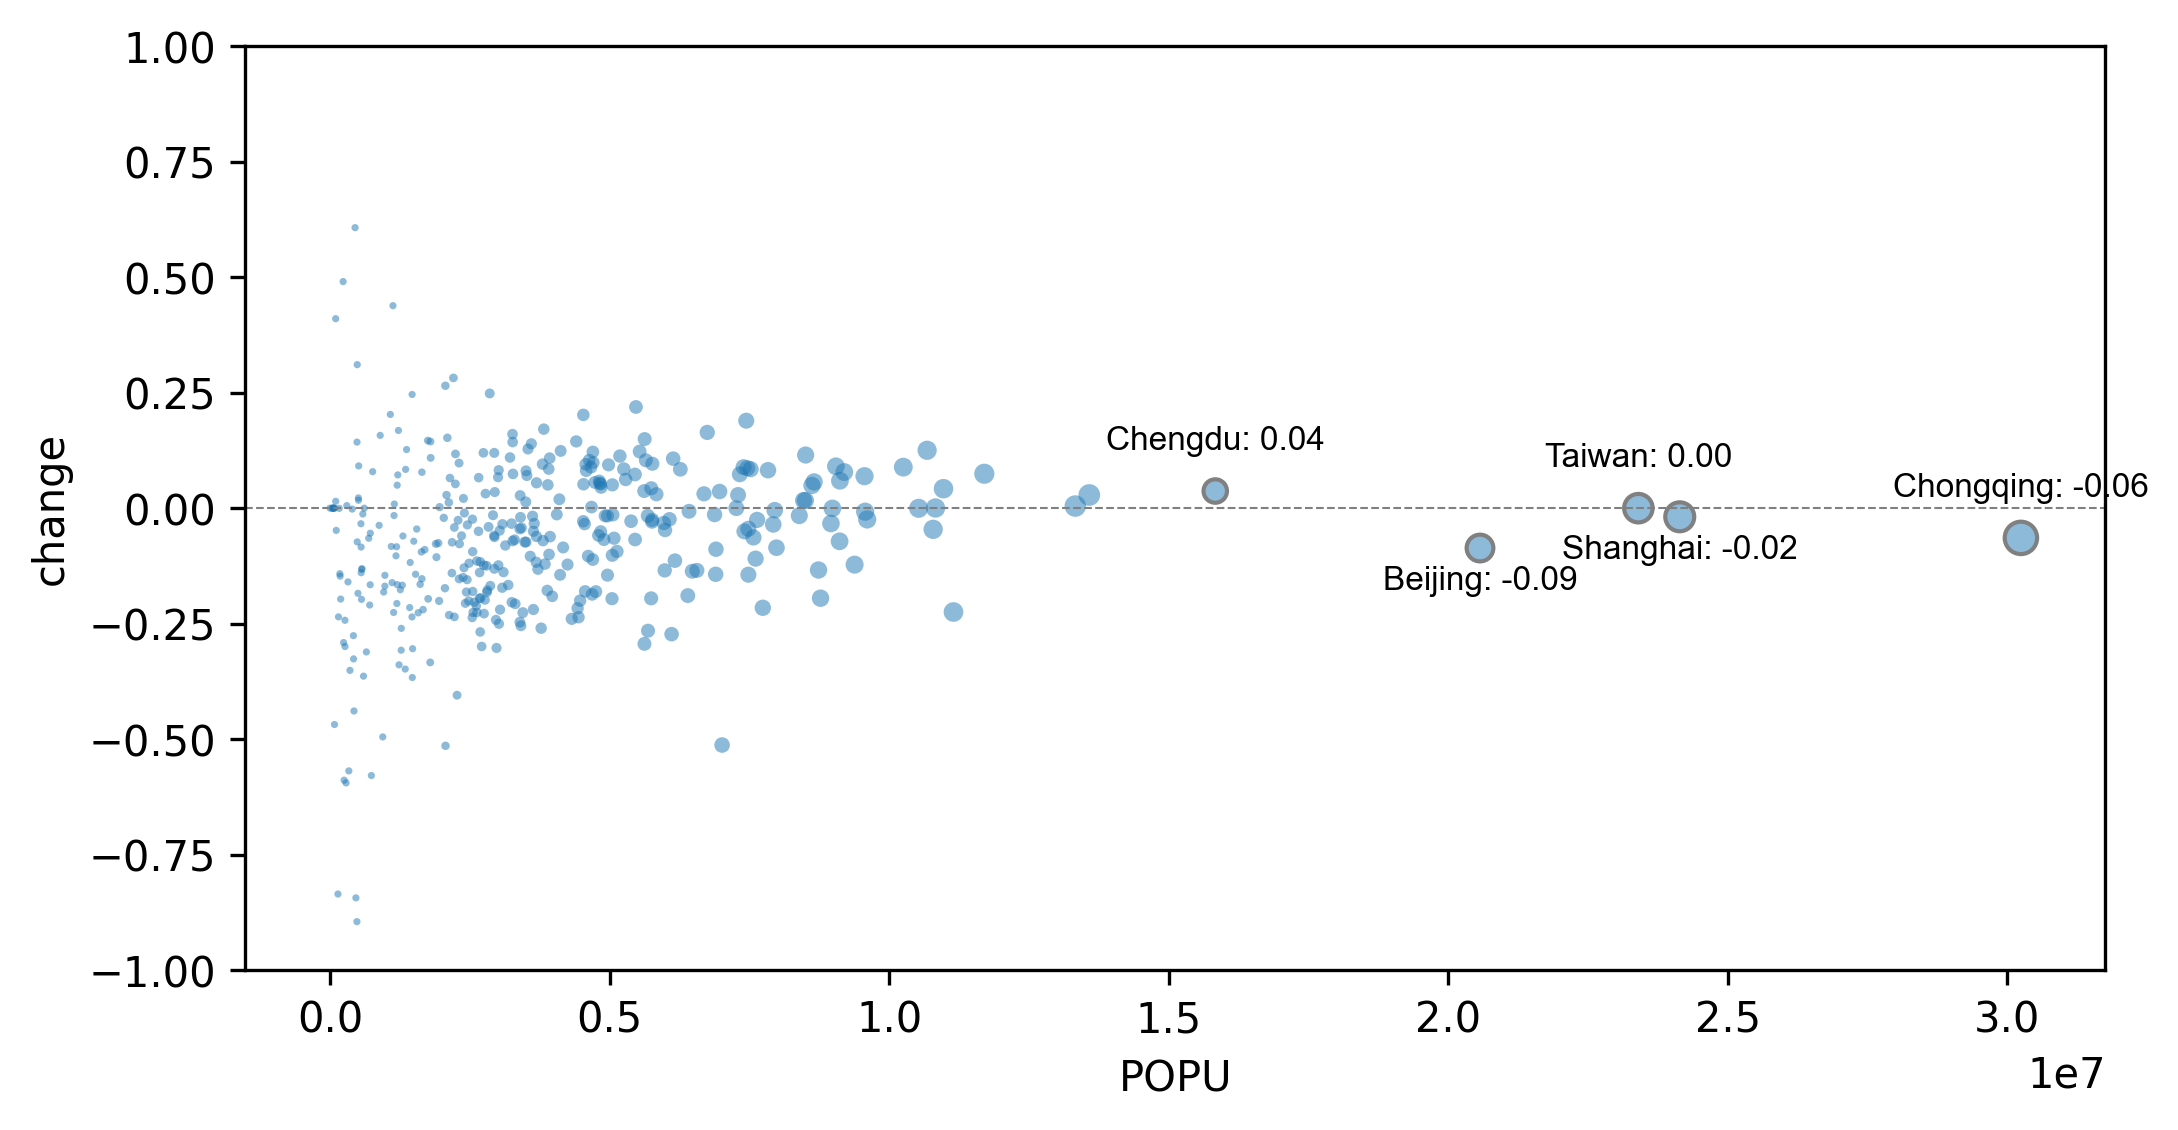

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=300)
plt.rcParams['font.family'] = 'Arial'
ax1.scatter(df_merged['value'], df_merged['2020_change_rate'], s=np.clip(df_merged['value']/500000, 3, None), edgecolors='none', alpha=0.5)
top5_indices = df_merged['value'].nlargest(5).index
ax1.scatter(df_merged.loc[top5_indices, 'value'], df_merged.loc[top5_indices, '2020_change_rate'], 
            s=df_merged.loc[top5_indices, 'value']/500000, edgecolors='gray', facecolors='none', linewidths=1)

i = 0
citys = ['Chongqing', 'Shanghai', 'Taiwan', 'Beijing', 'Chengdu']
for idx in top5_indices:
    x_value = df_merged.loc[idx, 'value']
    y_value = df_merged.loc[idx, '2020_change_rate']
    city = citys[i]
    i += 1
    
    # 标注y值，位置可以稍微偏移以避免重叠
    ax1.annotate(f'{city}: {y_value:.2f}', 
                 (x_value, y_value), 
                 textcoords="offset points", 
                 xytext=(0,10 * (-1)**(i+1)), ha='center', fontsize=8)

ax1.set_xlabel('POPU')
ax1.set_ylabel('change')
ax1.set_ylim(-1, 1)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

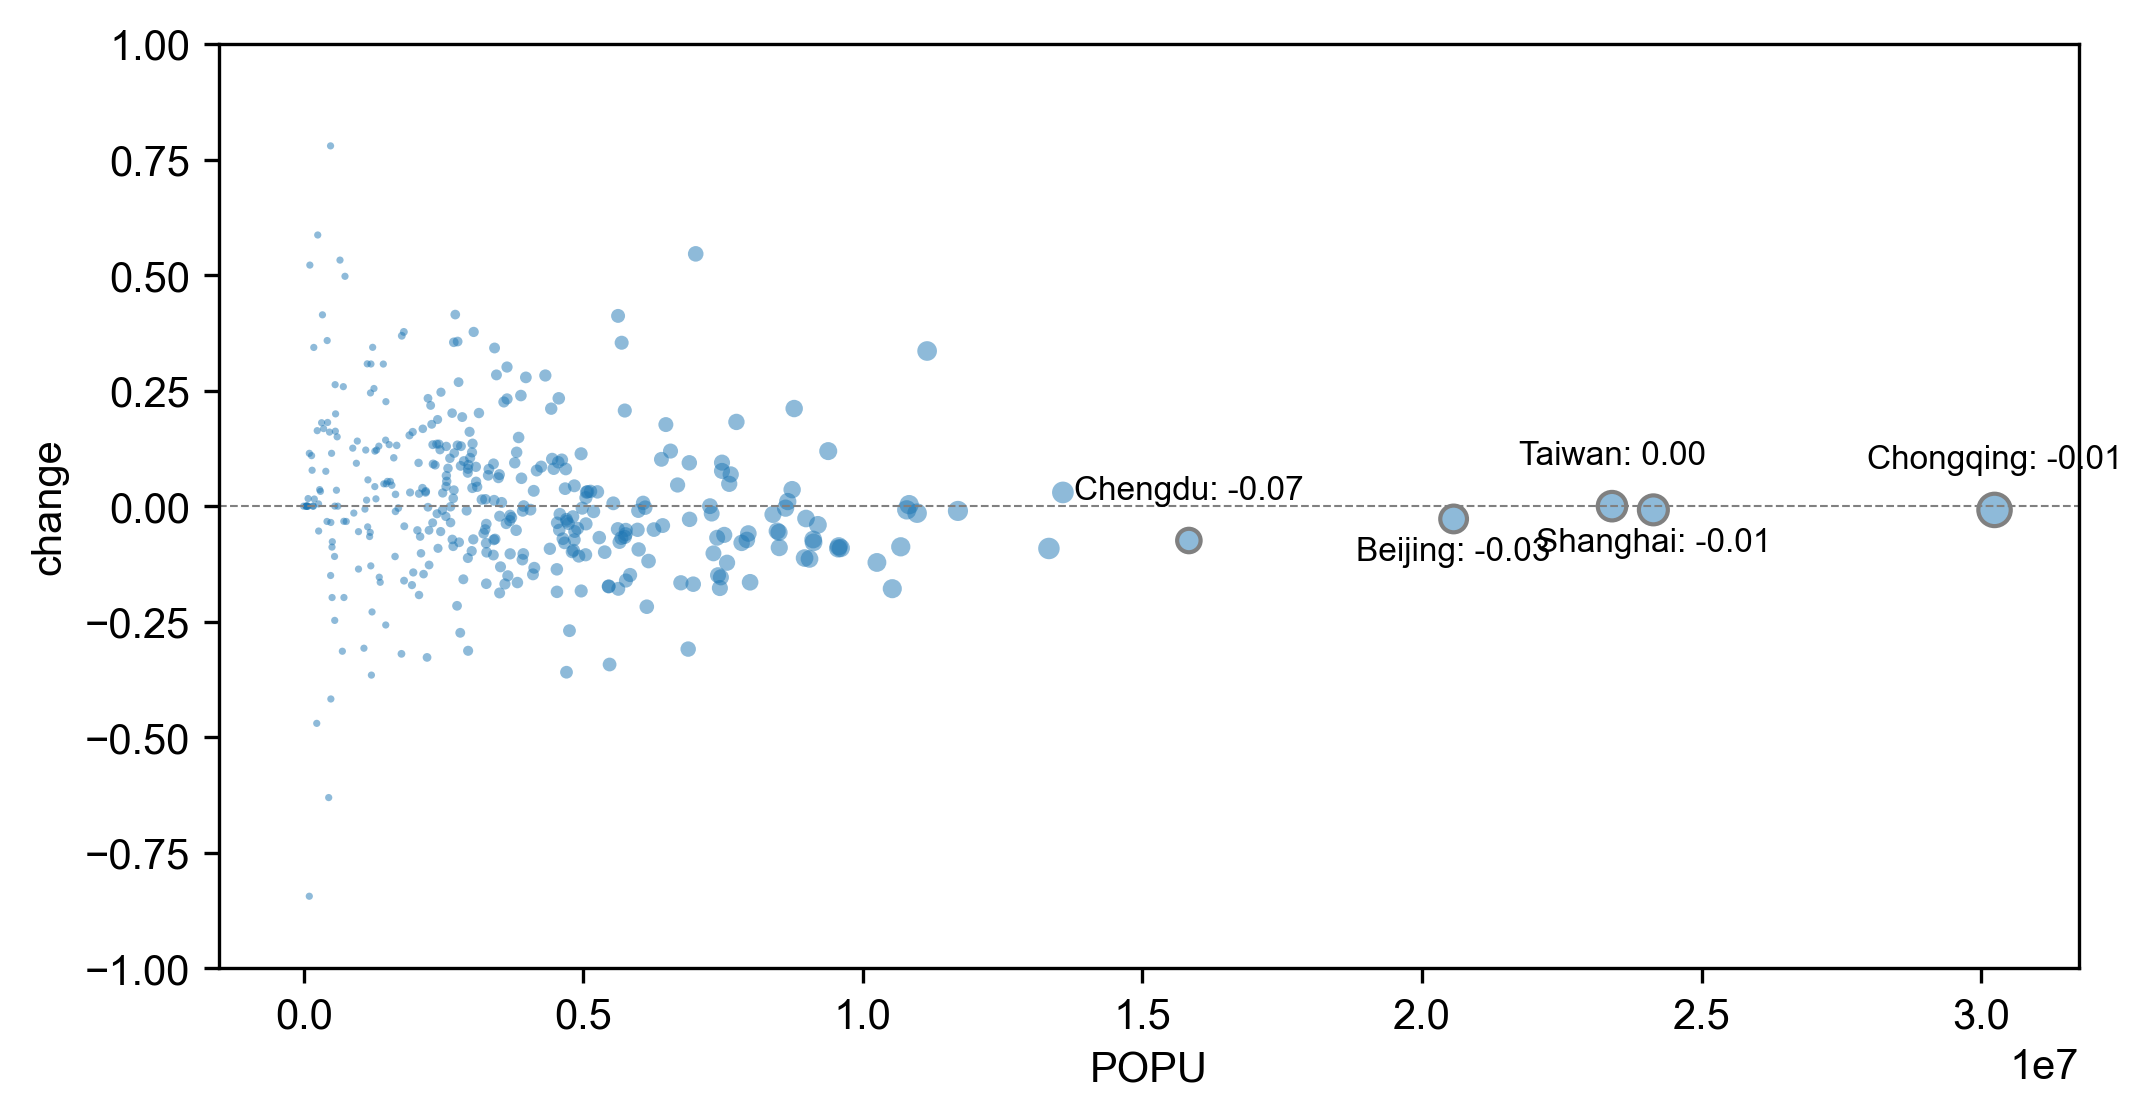

In [81]:
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=300)
plt.rcParams['font.family'] = 'Arial'
ax1.scatter(df_merged['value'], df_merged['2023_change_rate'], s=np.clip(df_merged['value']/500000, 3, None), edgecolors='none', alpha=0.5)
top5_indices = df_merged['value'].nlargest(5).index
ax1.scatter(df_merged.loc[top5_indices, 'value'], df_merged.loc[top5_indices, '2023_change_rate'], 
            s=df_merged.loc[top5_indices, 'value']/500000, edgecolors='gray', facecolors='none', linewidths=1)

i = 0
citys = ['Chongqing', 'Shanghai', 'Taiwan', 'Beijing', 'Chengdu']
for idx in top5_indices:
    x_value = df_merged.loc[idx, 'value']
    y_value = df_merged.loc[idx, '2023_change_rate']
    city = citys[i]
    i += 1
    
    # 标注y值，位置可以稍微偏移以避免重叠
    ax1.annotate(f'{city}: {y_value:.2f}', 
                 (x_value, y_value), 
                 textcoords="offset points", 
                 xytext=(0,10 * (-1)**(i+1)), ha='center', fontsize=8)

ax1.set_xlabel('POPU')
ax1.set_ylabel('change')
ax1.set_ylim(-1, 1)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

In [56]:
import plotly.express as px

In [58]:
fig = px.scatter(filtered_df, x='value', y='2023_change_rate', 
                 hover_data=['name_y', '2019'])  # hover_data 包含你想显示的其他列
fig.show()